<h1 align="center">Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск</h1>

In [1]:
# подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
# исходные данные
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
# функция для подсчета среднеквадратической ошибки
def mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
# начальные веса
W = np.random.randn(X.shape[1])
W

array([-1.56864406, -0.37283643,  0.74195636,  0.37402053])

In [5]:
# стандартизация
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [6]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

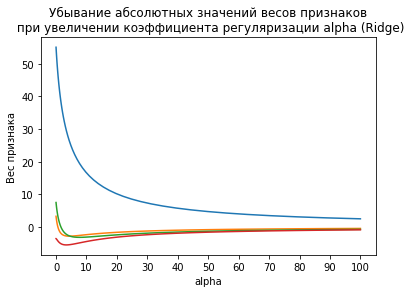

In [7]:
n = 100

train_amount = 5
train_X = X_st[:train_amount]
train_y = y[:train_amount]
test_X = X_st[train_amount:]
test_y = y[train_amount:]


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, так как нормализация затрагивает масштаб (диапазон) данных, а стандартизация изменяет форму распределения.

3. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

$$Q(w, X) + \lambda |w|^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda |w| = 2\lambda *(|w|)' $$

$$(|w|)' = \lim_{\Delta x \to 0} \frac{|x+\Delta x| - |x|}{\Delta x} = \lim_{\Delta x \to 0} \frac{(|x+\Delta x| - |x|)(|x+\Delta x| + |x|)}{\Delta x (|x+\Delta x| + |x|)} = \lim_{\Delta x \to 0} \frac{(|x+\Delta x|)^2 - (|x|)^2}{\Delta x (|x+\Delta x| + |x|)} = \lim_{\Delta x \to 0} \frac{(x+\Delta x)^2 - x^2}{\Delta x (|x+\Delta x| + |x|)} = \lim_{\Delta x \to 0} \frac{x^2 + 2x*\Delta x + (\Delta x)^2 -x^2}{\Delta x (|x+\Delta x| + |x|)} = \lim_{\Delta x \to 0} \frac{\Delta x(2x+ \Delta x)}{\Delta x (|x+\Delta x| + |x|)} = \lim_{\Delta x \to 0} \frac{2x+ \Delta x}{|x+\Delta x| + |x|} = \frac{2x}{2|x|} = \frac{x}{|x|},\ где\ x \neq 0$$

In [8]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W / abs(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {mse(y, np.dot(X, W))}')
    return W

In [9]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [12.08815397  1.36316464  1.57212953  3.36962808], error 3246.3817182284292
Iter: 500, weights: [56.49999999  6.30307117 -0.3562811   6.5713875 ], error 24.90461887903748
Iter: 1000, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.904618876908376
Iter: 1500, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.904618876908376
Iter: 2000, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.90461887690838
Iter: 2500, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.90461887690838
Iter: 3000, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.90461887690838
Iter: 3500, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.90461887690838
Iter: 4000, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.90461887690838
Iter: 4500, weights: [56.49999999  6.30309347 -0.35638879  6.57147638], error 24.90461887690838
Final MSE: 24.90461887690838


array([56.49999999,  6.30309347, -0.35638879,  6.57147638])